# Analisando a desigualdade no Brasil

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set_palette('Accent')

In [81]:
def hist(data, xlabel='', ylabel='', titulo='', stat='count', bins=75, kde=True):
    ax = sns.histplot(data, kde=kde, stat=stat, bins=bins)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(titulo, fontsize=16)
    ax.figure.set_size_inches((12, 6))
    return ax
def hist_cumulativo(data, xlabel='', ylabel='', titulo=''):
    ax = sns.ecdfplot(data)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(titulo, fontsize=16)
    ax.figure.set_size_inches((12, 6))
    return ax

def line_plot(data, xlabel='', ylabel='', titulo=''):
    ax = sns.lineplot(data=data)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(titulo, fontsize=16)
    ax.figure.set_size_inches((12, 6))
    return ax

def lm_plot(data, x, y, titulo='', xlabel='', ylabel=''):
    ax = sns.lmplot(data=data, x=x, y=y)
    ax.set_xlabels(xlabel, fontsize=14)
    ax.set_ylabels(ylabel, fontsize=14)
    ax.fig.suptitle(titulo, fontsize=16)
    ax.fig.set_size_inches((12, 6))
    return ax
    
def boxplot_x(data, x, y, hue=None, xlabel='', titulo='', size=(12, 6), ):
    ax = sns.boxplot(data = data, x=x, y=y, hue=hue, showmeans=True)
    ax.set_title(titulo, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.figure.set_size_inches(size)
    return ax

# Dados extraídos da PNAD (IBGE)

In [5]:
dados = pd.read_csv("dados.csv")
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}
dados.UF.replace(uf, inplace=True)
dados.Cor.replace(cor, inplace=True)
dados.Sexo.replace(sexo, inplace=True)
dados = dados[dados['Anos de Estudo'] < 17]
dados['Anos de Estudo'] -= 1

In [6]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11,800,1.603808
1,Rondônia,Feminino,23,Branca,11,1150,1.739790
2,Rondônia,Feminino,35,Parda,14,880,1.760444
3,Rondônia,Masculino,46,Branca,5,3500,1.783158
4,Rondônia,Feminino,47,Parda,8,150,1.690631


## Quantidade de Homens e Mulheres chefes de família:

In [7]:
dados.Sexo.value_counts(normalize=True)

Masculino    0.693355
Feminino     0.306645
Name: Sexo, dtype: float64

## A proporção entre homens e mulheres na população é de 45% para 55%, enquanto a proporção entre os chefes de família é de 69,3% para 30,7%

---

# Comparando as médias da Renda

In [8]:
dados.groupby('Sexo').Renda.describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
Feminino,23504.0,1569.65993,2574.792373,0.0,700.0,900.0,1520.0,120000.0
Masculino,53145.0,2194.21319,3593.375194,0.0,800.0,1350.0,2300.0,200000.0


In [9]:
from statsmodels.stats.weightstats import zconfint

In [10]:
media_homens = zconfint(dados.query('Sexo=="Masculino"').Renda)
media_homens

(2163.66261095428, 2224.7637697024143)

In [11]:
media_mulheres = zconfint(dados.query('Sexo=="Feminino"').Renda)
media_mulheres

(1536.7429932658026, 1602.5768671834828)

In [12]:
print(f'Os homens ganham entre R${round(media_homens[0] - media_mulheres[1], 2)} e R${round(media_homens[1] - media_mulheres[0], 2)} a mais do que as mulheres')

Os homens ganham entre R$561.09 e R$688.02 a mais do que as mulheres


# Comparando as médias dos Anos de Estudo

In [13]:
media_homens = zconfint(dados.query('Sexo=="Masculino"')['Anos de Estudo'])
media_homens

(8.066069090205525, 8.14313215167988)

In [14]:
media_mulheres = zconfint(dados.query('Sexo=="Feminino"')['Anos de Estudo'])
media_mulheres

(9.177328236565831, 9.290507025517218)

In [15]:
print(f'As mulheres estudam em média {round(media_mulheres[0] - media_homens[1], 2)} e {round(media_mulheres[1] - media_homens[0], 2)} anos a mais do que os homens')

As mulheres estudam em média 1.03 e 1.22 anos a mais do que os homens


## Visualizando gráficamente

In [16]:
dados_limitado = dados.query('Renda < 11000 & Renda > 0')

<AxesSubplot:title={'center':'Distribuição de Renda entre os Homens Chefes de Família'}, xlabel='Renda (R$)', ylabel='Frequência'>

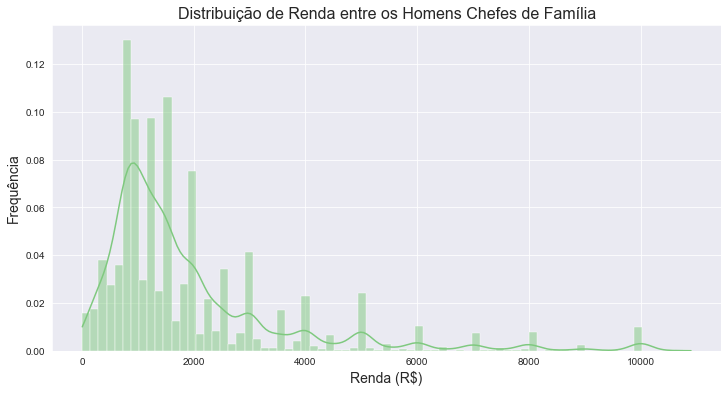

In [26]:
hist(dados_limitado.query('Sexo =="Masculino"').Renda, titulo='Distribuição de Renda entre os Homens Chefes de Família', ylabel='Frequência', xlabel='Renda (R$)', stat='probability')

<AxesSubplot:title={'center':'Distribuição de Renda entre as Mulheres Chefes de Família'}, xlabel='Renda (R$)', ylabel='Frequência'>

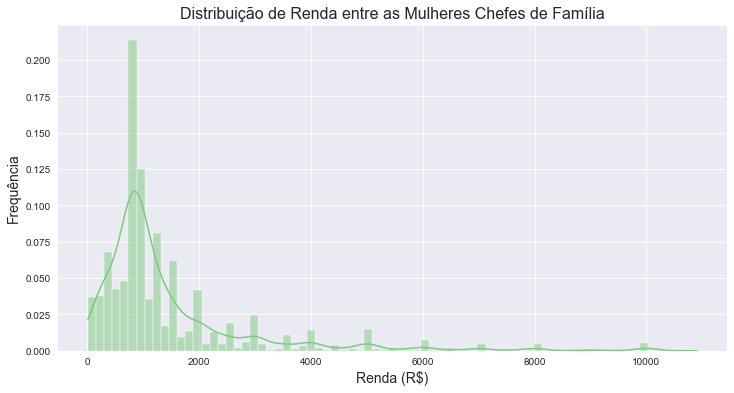

In [27]:
hist(dados_limitado.query('Sexo =="Feminino"').Renda, titulo='Distribuição de Renda entre as Mulheres Chefes de Família', ylabel='Frequência', xlabel='Renda (R$)', stat='probability')

<AxesSubplot:title={'center':'Distribuição do Estudo entre os Homens Chefes de Família'}, xlabel='Anos de Estudo', ylabel='Porcentagem'>

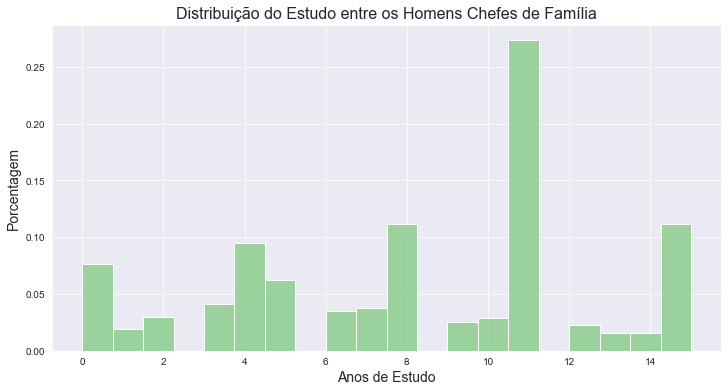

In [32]:
hist(dados_limitado.query('Sexo =="Masculino"')['Anos de Estudo'], titulo='Distribuição do Estudo entre os Homens Chefes de Família', ylabel='Porcentagem', xlabel='Anos de Estudo', stat='probability', bins=20, kde=False)

<AxesSubplot:title={'center':'Distribuição do Estudo entre as Mulheres Chefes de Família'}, xlabel='Anos de Estudo', ylabel='Porcentagem'>

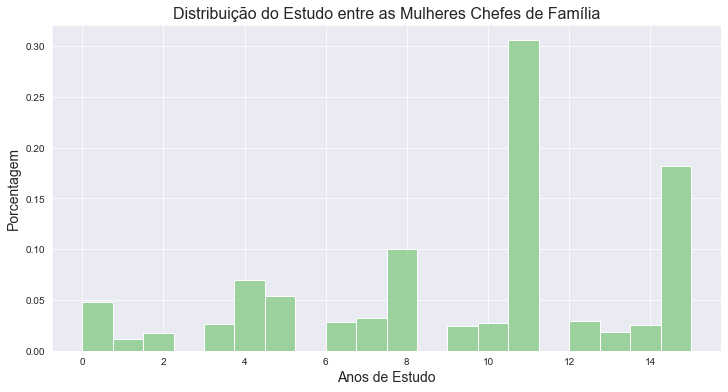

In [33]:
hist(dados_limitado.query('Sexo =="Feminino"')['Anos de Estudo'], titulo='Distribuição do Estudo entre as Mulheres Chefes de Família', ylabel='Porcentagem', xlabel='Anos de Estudo', stat='probability', bins=20, kde=False)

# Fazendo testes de hipótese

In [34]:
dados.corr()

,Idade,Anos de Estudo,Renda,Altura
Idade,1.000000,-0.267006,0.041097,-0.001266
Anos de Estudo,-0.267006,1.000000,0.334513,0.003751
Renda,0.041097,0.334513,1.000000,-0.004031
Altura,-0.001266,0.003751,-0.004031,1.000000


In [37]:
homens = dados[dados.Sexo == 'Masculino']
mulheres = dados[dados.Sexo == 'Feminino']

In [60]:
test_h = DescrStatsW(homens.Renda)
test_m = DescrStatsW(mulheres.Renda)

In [38]:
from scipy.stats import mannwhitneyu

In [56]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

## Teste bicaudal

### H<sub>0</sub>: Renda das mulheres == Renda dos homens
### H<sub>1</sub>: Renda das mulheres != Renda dos homens

In [50]:
stats, p_value = mannwhitneyu(mulheres.Renda, homens.Renda, alternative='two-sided')
print(stats)
print(p_value)

477327640.5
0.0


In [61]:
test = CompareMeans(test_h, test_m)
z, p_value = test.ztest_ind(alternative="two-sided", value=0)
p_value

7.427561598825379e-128

### Devemos rejeitar H<sub>0</sub>

## Teste Unicaudal Superior

### H<sub>0</sub>: Renda das mulheres >= Renda dos homens
### H<sub>1</sub>: Renda das mulheres < Renda dos homens

In [54]:
stats, p_value = mannwhitneyu(mulheres.Renda, homens.Renda, alternative='less')
print(stats)
print(p_value)

477327640.5
0.0


In [63]:
test = CompareMeans(test_h, test_m)
z, p_value = test.ztest_ind(alternative="larger", value=0)
p_value

3.7137807994126893e-128

## Teste Unicaudal Inferior

### H<sub>0</sub>: Renda das mulheres <= Renda dos homens
### H<sub>1</sub>: Renda das mulheres > Renda dos homens

In [55]:
stats, p_value = mannwhitneyu(mulheres.Renda, homens.Renda, alternative='greater')
print(stats)
print(p_value)

477327640.5
1.0


In [64]:
test = CompareMeans(test_h, test_m)
z, p_value = test.ztest_ind(alternative="smaller", value=0)
p_value

1.0

## Fazendo testes com a variável anos de Estudo

In [86]:
test_h = DescrStatsW(homens['Anos de Estudo'])
test_m = DescrStatsW(mulheres['Anos de Estudo'])

### H<sub>0</sub>: Estudo das mulheres <= Estudo dos homens
### H<sub>1</sub>: Estudo das mulheres > Estudo dos homens

In [87]:
test = CompareMeans(test_h, test_m)
z, p_value = test.ztest_ind(alternative="smaller", value=0)
p_value

1.654076520269829e-225

### H<sub>0</sub>: Estudo das mulheres >= Estudo dos homens
### H<sub>1</sub>: Estudo das mulheres < Estudo dos homens

In [89]:
test = CompareMeans(test_h, test_m)
z, p_value = test.ztest_ind(alternative="larger", value=0)
p_value

1.0

### H<sub>0</sub>: Estudo das mulheres == Estudo dos homens
### H<sub>1</sub>: Estudo das mulheres != Estudo dos homens

In [90]:
test = CompareMeans(test_h, test_m)
z, p_value = test.ztest_ind(alternative="two-sided", value=0)
p_value

3.308153040539658e-225

# Visualizando graficamente com boxplots

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

<AxesSubplot:title={'center':'Renda de Acordo com Sexo e Etnia, com Renda menor que 8000'}, xlabel='Renda em R$', ylabel='Cor'>

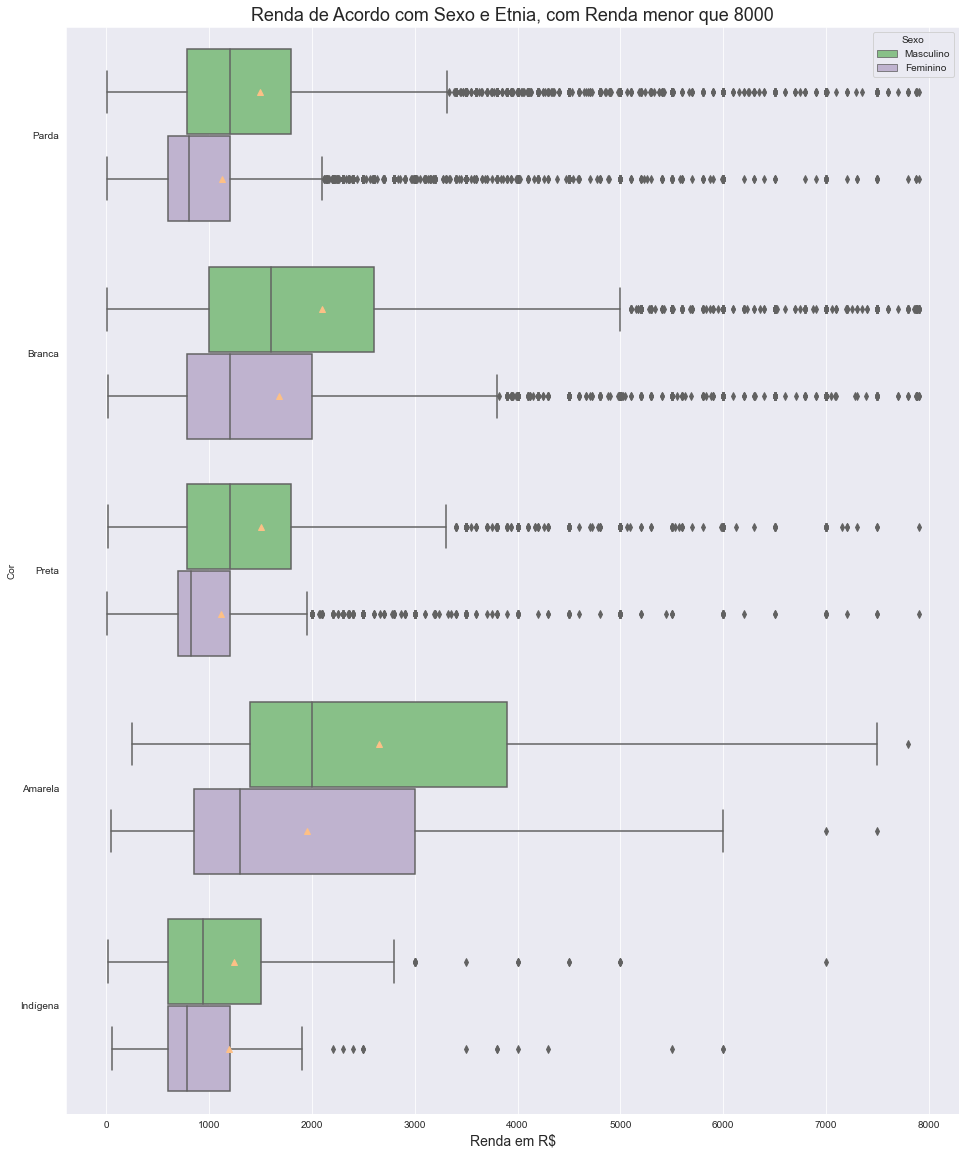

In [143]:
boxplot_x(data=dados.query('Renda > 0').query('Renda < 8000'), x='Renda', y='Cor', hue='Sexo', titulo='Renda de Acordo com Sexo e Etnia, com Renda menor que 8000', xlabel='Renda em R$', size=(16, 20))

<AxesSubplot:title={'center':'Anos de Estudo de acordo com Sexo e Etnia'}, xlabel='Renda em R$', ylabel='Cor'>

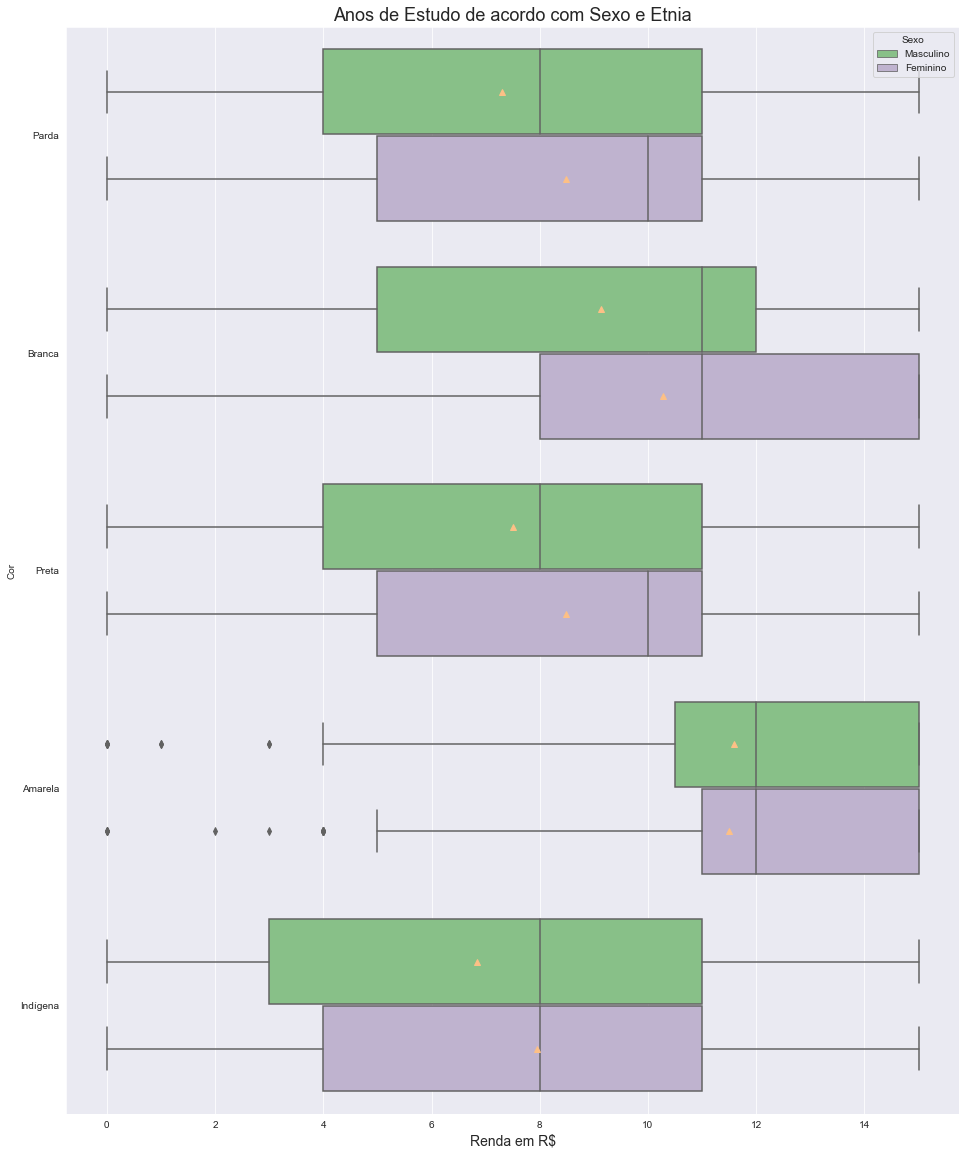

In [83]:
boxplot_x(data=dados, x='Anos de Estudo', y='Cor', hue='Sexo', titulo='Anos de Estudo de acordo com Sexo e Etnia', xlabel='Renda em R$', size=(16, 20))

In [84]:
dados.query('Renda > 0').query('Renda < 10000').corr()

,Idade,Anos de Estudo,Renda,Altura
Idade,1.000000,-0.251815,0.027138,-0.002605
Anos de Estudo,-0.251815,1.000000,0.445477,0.005461
Renda,0.027138,0.445477,1.000000,0.003185
Altura,-0.002605,0.005461,0.003185,1.000000


In [85]:
dados.corr()

,Idade,Anos de Estudo,Renda,Altura
Idade,1.000000,-0.267006,0.041097,-0.001266
Anos de Estudo,-0.267006,1.000000,0.334513,0.003751
Renda,0.041097,0.334513,1.000000,-0.004031
Altura,-0.001266,0.003751,-0.004031,1.000000


# Criando um modelo de regressão

In [92]:
import statsmodels.api as sm

## Para simplificar o modelo e aumentar sua precisão, vamos considerar somente as pessoas cuja renda está entre 500 e 10000

In [108]:
dados_filtrado = dados[dados.Renda > 500]
dados_filtrado = dados_filtrado[dados_filtrado.Renda < 10000]

In [109]:
X = sm.add_constant(dados_filtrado['Anos de Estudo'])
Y = dados_filtrado.Renda
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

In [112]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  Renda   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:14:54   Log-Likelihood:            -5.4317e+05
No. Observations:               62904   AIC:                         1.086e+06
Df Residuals:                   62902   BIC:                         1.086e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            609.2686     12.781     47.

### Fórmula Desenvolvida : Renda = 609,27 + 142,15 * Anos de Estudo

In [114]:
resultado_regressao.predict([1, 15])[0]

2741.4656211050487

### Exemplo: Uma pessoa com 15 anos de estudo ganharia: 2741,46 reais

### Vamos dividir de acordo com gênero e cor para comparar os resultados

## Homens

In [124]:
homens = dados_filtrado.query('Sexo == "Masculino"')

X = sm.add_constant(homens['Anos de Estudo'])
Y = homens.Renda
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

In [125]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  Renda   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     9632.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:25:36   Log-Likelihood:            -3.8749e+05
No. Observations:               44829   AIC:                         7.750e+05
Df Residuals:                   44827   BIC:                         7.750e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            694.8406     14.650     47.

### Fórmula Desenvolvida : Renda = 694,84 + 150,70 * Anos de Estudo

In [126]:
previsao_homem = resultado_regressao.predict([1, 15])[0]
previsao_homem

2955.47291369705

### Um homem com 15 anos de estudo ganharia um salário de 2955,47 reais

## Mulheres:

In [127]:
mulheres = dados_filtrado.query('Sexo == "Feminino"')

X = sm.add_constant(mulheres['Anos de Estudo'])
Y = mulheres.Renda
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

In [128]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  Renda   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     4527.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:25:50   Log-Likelihood:            -1.5445e+05
No. Observations:               18075   AIC:                         3.089e+05
Df Residuals:                   18073   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             78.8372     25.065      3.

### Fórmula Desenvolvida : Renda = 78,83 + 155,71 * Anos de Estudo

In [129]:
previsao_mulher = resultado_regressao.predict([1, 15])[0]
previsao_mulher

2414.4920365721614

### Uma mulher com 15 anos de Estudo ganharia 2414,49 reais

In [130]:
previsao_homem - previsao_mulher

540.9808771248886

### Diferença de: 540,98 reais

## Homens Brancos

In [136]:
homens_brancos = dados_filtrado.query('Sexo == "Masculino"').query('Cor == "Branca"')

X = sm.add_constant(homens_brancos['Anos de Estudo'])
Y = homens_brancos.Renda
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

In [137]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  Renda   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     4547.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:28:42   Log-Likelihood:            -1.6827e+05
No. Observations:               19220   AIC:                         3.365e+05
Df Residuals:                   19218   BIC:                         3.366e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            684.4636     26.823     25.

### Fórmula Desenvolvida : Renda = 684,46 + 177,86 * Anos de Estudo

In [138]:
previsao_homem_branco = resultado_regressao.predict([1, 15])[0]
previsao_homem_branco

3352.4234201494037

## Um homem branco com 15 anos de estudo teria uma renda de 3352,42 reais

## Mulheres Negras

In [139]:
mulheres_negras = dados_filtrado.query('Sexo == "Feminino"').query('Cor == "Preta"')

X = sm.add_constant(mulheres_negras['Anos de Estudo'])
Y = mulheres_negras.Renda
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

In [140]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  Renda   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     369.0
Date:                Sat, 23 Oct 2021   Prob (F-statistic):           4.43e-76
Time:                        18:33:42   Log-Likelihood:                -18054.
No. Observations:                2174   AIC:                         3.611e+04
Df Residuals:                    2172   BIC:                         3.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            398.3626     53.549      7.

### Fórmula Desenvolvida : Renda = 398,36 + 101,36 * Anos de Estudo

In [141]:
previsao_mulher_negra = resultado_regressao.predict([1, 15])[0]
previsao_mulher_negra

1918.8385354804623

## Uma mulher negra com 15 anos de estudo ganharia 1918,83 reais

In [142]:
previsao_homem_branco - previsao_mulher_negra

1433.5848846689414

## Diferença entre o salário de um homem branco e de uma mulher negra: 1433,58 reais